# Blue & Fin Whale Movements in South California (2014-15)

In [91]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import os
from datetime import datetime
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.sans-serif']=['Segoe UI Emoji']
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

# Extraction of Whale Movement Data from Move Bank (Animal Tracking Data)

In [92]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))

if os.path.isfile("whale_movement_data.csv"):
    filepath = "whale_movement_data.csv"
    print("loading from file")

whale_movement_data = pd.read_csv(filepath)

print ("done")

if os.path.isfile("extra_whale_movement_data.csv"):
    filepath = "extra_whale_movement_data.csv"
    print ("loading form file")
extra_whale_movement_data = pd.read_csv(filepath)

print("done")

loading from file
done
loading form file
done


# Some Background Information about the Whales

In [93]:
extra_wmd = extra_whale_movement_data

# Converting from coordinate based dataframe to geodataframe
# Create geometry column
geometry = gpd.points_from_xy(extra_wmd["deploy-on-longitude"], extra_wmd["deploy-on-latitude"])
crs = {'init': 'epsg:4326'}
whale_info_gdf = gpd.GeoDataFrame(extra_wmd, crs=crs, geometry=geometry)

extra_wmd.head()

C:\Users\lenovo\anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


tag-id         animal-id           animal-taxon  \
0  2014CA-MK10-05650  2014CA-Bmu-05650  Balaenoptera musculus   
1  2014CA-MK10-05803  2014CA-Bmu-05803  Balaenoptera musculus   
2  2014CA-MK10-05644  2014CA-Bmu-05644  Balaenoptera musculus   
3  2014CA-MK10-05655  2014CA-Bmu-05655  Balaenoptera musculus   
4  2014CA-MK10-05685  2014CA-Bph-05685  Balaenoptera physalus   

            deploy-on-date          deploy-off-date animal-life-stage  \
0  2014-08-04 18:36:00.000  2014-08-23 17:25:53.000             adult   
1  2014-08-04 20:23:00.000  2014-08-23 02:23:50.000             adult   
2  2014-08-04 20:54:00.000  2014-08-23 17:26:41.000             adult   
3  2014-08-06 22:23:00.000  2014-08-26 18:04:04.000             adult   
4  2014-08-06 23:10:00.000  2014-08-18 20:20:42.000             adult   

  animal-nickname animal-sex attachment-type  deploy-on-latitude  \
0       2014_5650          m         implant             33.9758   
1       2014_5803          f         implant             34.0094   
2       2014_5644          f         implant             34.0010   
3       2014_5655          f         implant             33.9876   
4       2014_5685          m         implant             33.9825   

   deploy-on-longitude deployment-id manipulation-type tag-manufacturer-name  \
0            -119.0048    2014-05650              none    Wildlife Computers   
1            -119.0481    2014-05803              none    Wildlife Computers   
2            -119.0433    2014-05644              none    Wildlife Computers   
3            -119.0427    2014-05655              none    Wildlife Computers   
4            -119.0008    2014-05685              none    Wildlife Computers   

  tag-model tag-readout-method                     geometry  
0  MK10 PAT      tag-retrieval  POINT (-119.00480 33.97580)  
1  MK10 PAT      tag-retrieval  POINT (-119.04810 34.00940)  
2  MK10 PAT      tag-retrieval  POINT (-119.04330 34.00100)  
3  MK10 PAT      tag-retrieval  POINT (-119.04270 33.98760)  
4  MK10 PAT      tag-retrieval  POINT (-119.00080 33.98250)

# Here are the two species of whales that have been tracked off Southern California in the summer of 2014 & 2015.

![blue whale](images\blue_whale.png) ![fin whale](images\fin_whale.png)

Overall, information in Graphs about the number of whales and sex in both years

The movements of the whales have recorded off Southern California in the summer of 2014 & 2015. 

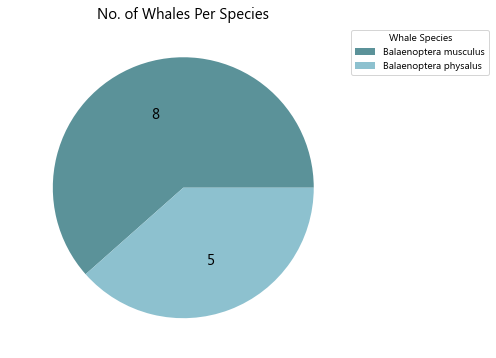

In [94]:
# NUMBER OF WHALES WITHIN EACH SPECIES
numbers = whale_info_gdf.groupby(["animal-taxon"]).size()

whale_info_gdf.groupby(["animal-taxon"]).size().plot.pie(
    subplots=True, 
    y = "Number of Whales per Species",
    ylabel= " ",
    colors=('#5b9299','#8dc1cf'),
    labeldistance=None,
    autopct= lambda p: '{:.0f}'.format((p/100)*numbers.sum()),
    fontsize=15,
    figsize=(6,6)
    )
plt.title("No. of Whales Per Species", fontweight="bold", fontsize=15)
plt.legend(title="Whale Species",bbox_to_anchor=(1,1), loc='upper left')

# wg = whale_info_gdf.groupby("animal-taxon")
# for tag_id, gdf in wg:
#     print(tag_id, gdf.shape)

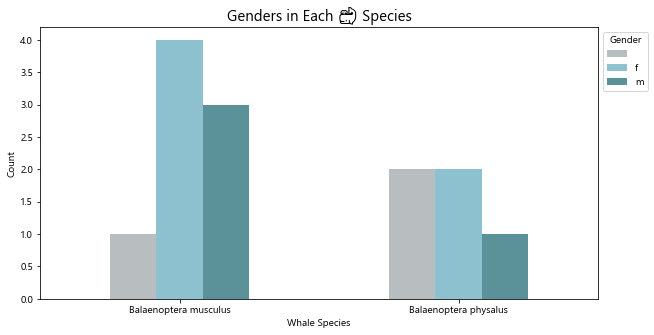

In [131]:
# KNOWN SEX WITHIN EACH SPECIES
whale_info_gdf.groupby('animal-taxon')['animal-sex'].value_counts().unstack().plot.bar(
    xlabel="Whale Species", 
    ylabel="Count",
    color=['#b8bec0','#8dc1cf','#5b9299']
    ) 
# Rotation of the xlabel names
plt.xticks(rotation=0)
plt.title("Sex of 🐳 in each species", fontweight="bold", fontsize=15)
plt.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left') 

In [133]:
# Make start making names for each tag_id??
wg = whale_info_gdf.groupby("animal-id")
for tag_id, gdf in wg:
    print(tag_id)
    # print(tag_id, gdf.shape)

2014CA-Bmu-05644
2014CA-Bmu-05650
2014CA-Bmu-05655
2014CA-Bmu-05803
2014CA-Bph-05685
2014CA-Bph-05790
2014CA-Bph-05838
2015CA-Bmu-00838
2015CA-Bmu-00840
2015CA-Bmu-04177
2015CA-Bmu-05650
2015CA-Bph-05644
2015CA-Bph-05654


# Deployment Location

(30.0, 42.0)

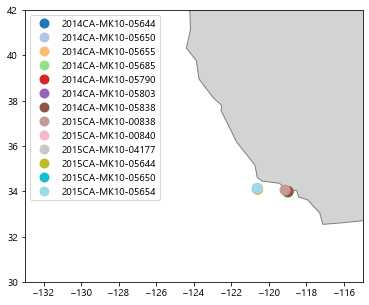

In [130]:
base = countries[countries.iso_a3=="USA"].plot(color='lightgrey', edgecolor='grey')
whale_info_gdf.plot(ax= base, marker='o', markersize=100, column= "tag-id",categorical=True, legend=True, cmap='tab20')

# Altering the limits on the graph axis to focus on the location
plt.xlim([-133,-115])
plt.ylim([30,42])

In [98]:
whale_movement_data.columns = whale_movement_data.columns.str.replace("-", "_") #cleans column names
whale_movement_data.columns = whale_movement_data.columns.str.replace(":", "_")#cleans column names

# Converting from coordinate based dataframe to geodataframe
# Create geometry column
geometry = gpd.points_from_xy(whale_movement_data["location_long"], whale_movement_data["location_lat"])

# Create geometry column system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
whale_gdf = gpd.GeoDataFrame(whale_movement_data, crs=crs, geometry=geometry)

C:\Users\lenovo\anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [99]:
# preparing the data for movingpandas?
whale_gdf['t'] = pd.to_datetime(whale_gdf['timestamp'])
whale_gdf = whale_gdf.set_index('t').tz_localize(None)
whale_gdf.head()

event_id  visible                timestamp  \
t                                                                    
2014-08-04 21:33:14  12217824461     True  2014-08-04 21:33:14.000   
2014-08-04 23:13:06  12217824462     True  2014-08-04 23:13:06.000   
2014-08-05 00:10:00  12217824463     True  2014-08-05 00:10:00.000   
2014-08-05 00:17:00  12217824464     True  2014-08-05 00:17:00.000   
2014-08-05 00:24:01  12217824465     True  2014-08-05 00:24:01.000   

                     location_long  location_lat  gps_satellite_count  \
t                                                                       
2014-08-04 21:33:14      -119.0606       33.9908                    5   
2014-08-04 23:13:06      -119.0492       34.0167                    6   
2014-08-05 00:10:00      -119.0330       33.9996                    5   
2014-08-05 00:17:00      -119.0331       33.9994                    7   
2014-08-05 00:24:01      -119.0343       33.9991                    4   

                     location_error_numerical manually_marked_outlier  \
t                                                                       
2014-08-04 21:33:14                       1.1                     NaN   
2014-08-04 23:13:06                       6.6                     NaN   
2014-08-05 00:10:00                       3.5                     NaN   
2014-08-05 00:17:00                       9.1                     NaN   
2014-08-05 00:24:01                       1.4                     NaN   

                    sensor_type individual_taxon_canonical_name  \
t                                                                 
2014-08-04 21:33:14         gps           Balaenoptera musculus   
2014-08-04 23:13:06         gps           Balaenoptera musculus   
2014-08-05 00:10:00         gps           Balaenoptera musculus   
2014-08-05 00:17:00         gps           Balaenoptera musculus   
2014-08-05 00:24:01         gps           Balaenoptera musculus   

                    tag_local_identifier individual_local_identifier  \
t                                                                      
2014-08-04 21:33:14    2014CA-MK10-05644            2014CA-Bmu-05644   
2014-08-04 23:13:06    2014CA-MK10-05644            2014CA-Bmu-05644   
2014-08-05 00:10:00    2014CA-MK10-05644            2014CA-Bmu-05644   
2014-08-05 00:17:00    2014CA-MK10-05644            2014CA-Bmu-05644   
2014-08-05 00:24:01    2014CA-MK10-05644            2014CA-Bmu-05644   

                                                            study_name  \
t                                                                        
2014-08-04 21:33:14  Blue and fin whales Southern California 2014-2...   
2014-08-04 23:13:06  Blue and fin whales Southern California 2014-2...   
2014-08-05 00:10:00  Blue and fin whales Southern California 2014-2...   
2014-08-05 00:17:00  Blue and fin whales Southern California 2014-2...   
2014-08-05 00:24:01  Blue and fin whales Southern California 2014-2...   

                       utm_easting  utm_northing utm_zone study_timezone  \
t                                                                          
2014-08-04 21:33:14  309672.037059  3.763050e+06      11N      GMT-08:00   
2014-08-04 23:13:06  310782.649904  3.765901e+06      11N      GMT-08:00   
2014-08-05 00:10:00  312241.097055  3.763975e+06      11N      GMT-08:00   
2014-08-05 00:17:00  312231.419727  3.763953e+06      11N      GMT-08:00   
2014-08-05 00:24:01  312119.914340  3.763922e+06      11N      GMT-08:00   

                       study_local_timestamp                     geometry  
t                                                                          
2014-08-04 21:33:14  2014-08-04 13:33:14.000  POINT (-119.06060 33.99080)  
2014-08-04 23:13:06  2014-08-04 15:13:06.000  POINT (-119.04920 34.01670)  
2014-08-05 00:10:00  2014-08-04 16:10:00.000  POINT (-119.03300 33.99960)  
2014-08-05 00:17:00  2014-08-04 16:17:00.000  POINT (-119.03310 33.99940)  
2014-08-05 00:24:01  2014-

In [100]:
# cleaning up the data
cols_to_drop = ["visible","timestamp","gps_satellite_count","location_error_numerical","manually_marked_outlier", "sensor_type","utm_easting","utm_northing","utm_zone","study_timezone","study_local_timestamp"]
whale_gdf.drop(cols_to_drop, axis=1, inplace=True, errors="ignore")

whale_gdf.head()

event_id  location_long  location_lat  \
t                                                               
2014-08-04 21:33:14  12217824461      -119.0606       33.9908   
2014-08-04 23:13:06  12217824462      -119.0492       34.0167   
2014-08-05 00:10:00  12217824463      -119.0330       33.9996   
2014-08-05 00:17:00  12217824464      -119.0331       33.9994   
2014-08-05 00:24:01  12217824465      -119.0343       33.9991   

                    individual_taxon_canonical_name tag_local_identifier  \
t                                                                          
2014-08-04 21:33:14           Balaenoptera musculus    2014CA-MK10-05644   
2014-08-04 23:13:06           Balaenoptera musculus    2014CA-MK10-05644   
2014-08-05 00:10:00           Balaenoptera musculus    2014CA-MK10-05644   
2014-08-05 00:17:00           Balaenoptera musculus    2014CA-MK10-05644   
2014-08-05 00:24:01           Balaenoptera musculus    2014CA-MK10-05644   

                    individual_local_identifier  \
t                                                 
2014-08-04 21:33:14            2014CA-Bmu-05644   
2014-08-04 23:13:06            2014CA-Bmu-05644   
2014-08-05 00:10:00            2014CA-Bmu-05644   
2014-08-05 00:17:00            2014CA-Bmu-05644   
2014-08-05 00:24:01            2014CA-Bmu-05644   

                                                            study_name  \
t                                                                        
2014-08-04 21:33:14  Blue and fin whales Southern California 2014-2...   
2014-08-04 23:13:06  Blue and fin whales Southern California 2014-2...   
2014-08-05 00:10:00  Blue and fin whales Southern California 2014-2...   
2014-08-05 00:17:00  Blue and fin whales Southern California 2014-2...   
2014-08-05 00:24:01  Blue and fin whales Southern California 2014-2...   

                                        geometry  
t                                                 
2014-08-04 21:33:14  POINT (-119.06060 33.99080)  
2014-08-04 23:13:06  POINT (-119.04920 34.01670)  
2014-08-05 00:10:00  POINT (-119.03300 33.99960)  
2014-08-05 00:17:00  POINT (-119.03310 33.99940)  
2014-08-05 00:24:01  POINT (-119.03430 33.99910)

In [101]:
# Whale Movement plotted (need to separate and make a legend to distigiush each individual)
wg = whale_gdf.groupby("tag_local_identifier")
for tag_id, gdf in wg:
    print(tag_id, gdf.shape)
# whale_gdf.plot(marker='o', color = "b", label = "tag_id", markersize=0.5)

2014CA-MK10-05644 (191, 8)
2014CA-MK10-05650 (2281, 8)
2014CA-MK10-05655 (816, 8)
2014CA-MK10-05685 (99, 8)
2014CA-MK10-05790 (14, 8)
2014CA-MK10-05803 (2575, 8)
2014CA-MK10-05838 (227, 8)
2015CA-MK10-00838 (3632, 8)
2015CA-MK10-00840 (1624, 8)
2015CA-MK10-04177 (1532, 8)
2015CA-MK10-05644 (11, 8)
2015CA-MK10-05650 (2437, 8)
2015CA-MK10-05654 (1730, 8)


In [102]:
# # Whale Data Movement Plotted with Legend of Individual Whale Identifiers
# whale_gdf.plot(marker='o', markersize=0.25, column= "tag_local_identifier", legend=True)

# # Test plot of whale gdf into world map
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting Whale Movements in Southern California Context

In [103]:
# Extracting USA from the World Map
countries[countries.iso_a3=="USA"]

pop_est      continent                      name iso_a3  gdp_md_est  \
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

(30.0, 42.0)

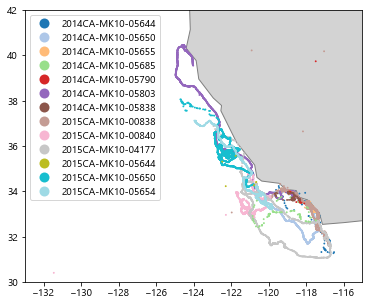

In [126]:
base = countries[countries.iso_a3=="USA"].plot(color='lightgrey', edgecolor='grey')
whale_gdf.plot(ax= base, marker='o', markersize=0.75, column= "tag_local_identifier", categorical=True, legend=True,cmap='tab20' )
# whale_gdf.plot(ax = base, marker='o', color='b', markersize=0.5)

# Altering the limits on the graph axis to focus on the location
plt.xlim([-133,-115])
plt.ylim([30,42])

# Visuals of stop detection or whenever the whales are close to each other 

# Moving Visualisation of the Whale Movements in 2015

Focus being on the 5 whales tracked in 2015.

# Extra Stuff

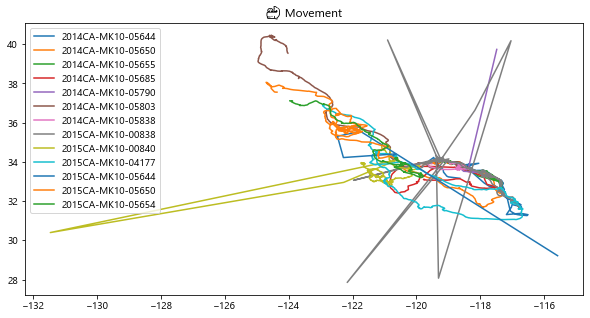

In [121]:
plt.title("🐳 Movement")
wg = whale_gdf.groupby("tag_local_identifier")
for tag_id, df in wg:
    # print(tag_id, df.shape)
    plt.plot(df.location_long, df.location_lat, label=tag_id)
plt.legend()

<AxesSubplot:xlabel='location_long', ylabel='location_lat'>

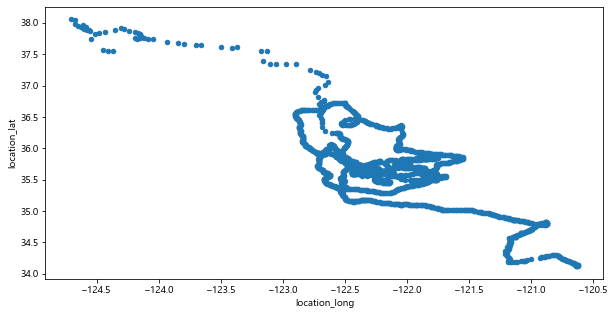

In [111]:
#Scatter plot of specific individual whale
whale_gdf[whale_gdf.tag_local_identifier=="2015CA-MK10-05650"].plot.scatter("location_long", "location_lat")

In [12]:
row_one["location_long"]

-119.0492

In [13]:
whale_movement_data["tag_local_identifier"]


0        2014CA-MK10-05644
1        2014CA-MK10-05644
2        2014CA-MK10-05644
3        2014CA-MK10-05644
4        2014CA-MK10-05644
               ...        
17164    2015CA-MK10-05654
17165    2015CA-MK10-05654
17166    2015CA-MK10-05654
17167    2015CA-MK10-05654
17168    2015CA-MK10-05654
Name: tag_local_identifier, Length: 17169, dtype: object

<AxesSubplot:xlabel='location_long', ylabel='location_lat'>

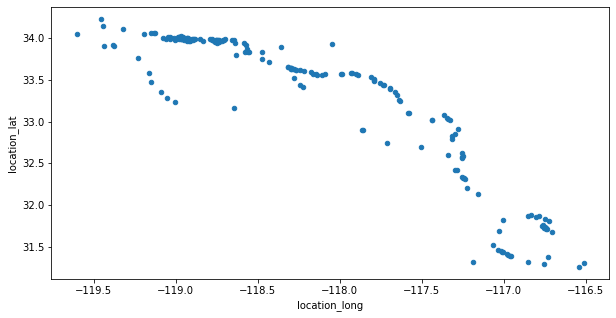

In [39]:
#Filtered the data from whale_movement_data to obtain only the data from a specific whale's identifier (eg. '2014CA-MK10-05644')
# https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/

filter_whale1 =whale_movement_data['tag_local_identifier'] == '2014CA-MK10-05644'
# print(whale1.head())
whale05644=whale_movement_data[filter_whale1]
# print(whale_movement_data.shape)
# print(whale2.head())
whale05644.plot.scatter(x = 'location_long', y = 'location_lat')

<AxesSubplot:xlabel='location_long', ylabel='location_lat'>

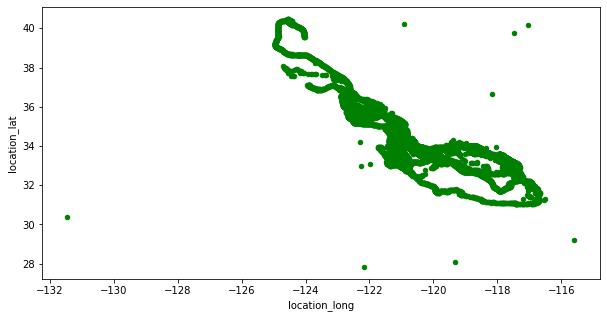

In [61]:
whale_movement_data.plot.scatter(x = 'location_long', y = 'location_lat', c='green')


# 🐳 _fin_ 🐳